In [5]:
%pip install numpy pandas scikit-learn tensorflow hmmlearn



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


**Data Preprocessing**

In [8]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
df = pd.read_csv('Language_Detection.csv')

# Function to preprocess the text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters, numbers, punctuations
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply preprocessing
df['Cleaned_Text'] = df['Text'].apply(preprocess_text)

# Encode language labels into numerical values
label_encoder = LabelEncoder()
df['Language_Code'] = label_encoder.fit_transform(df['Language'])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Cleaned_Text'], df['Language_Code'], test_size=0.2, random_state=42)


**Model 1: Naive Bayes (TF-IDF + NB)**

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predictions and evaluation
y_pred_nb = nb_model.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes Accuracy: {nb_accuracy * 100:.2f}%')


Naive Bayes Accuracy: 68.71%


**CNN**

Epoch 1/5


c:\Users\Harpreet singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


207/207 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.2792 - loss: 2.2207 - val_accuracy: 0.7279 - val_loss: 0.7924
Epoch 2/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7207 - loss: 0.7649 - val_accuracy: 0.7412 - val_loss: 0.7152
Epoch 3/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7396 - loss: 0.6677 - val_accuracy: 0.7328 - val_loss: 0.7039
Epoch 4/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7503 - loss: 0.6333 - val_accuracy: 0.7424 - val_loss: 0.7053
Epoch 5/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7534 - loss: 0.6195 - val_accuracy: 0.7455 - val_loss: 0.7189
CNN Accuracy: 74.18%


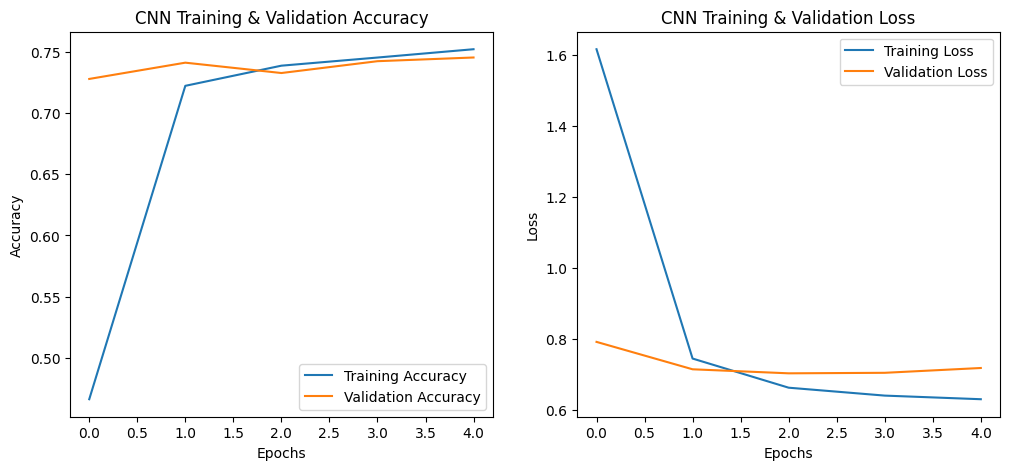

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
import matplotlib.pyplot as plt

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input length
X_train_pad = pad_sequences(X_train_seq, maxlen=100)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)

# Build CNN model
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(len(label_encoder.classes_), activation='softmax'))

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model and capture the history
history = cnn_model.fit(X_train_pad, y_train, epochs=5, validation_split=0.2)

# Evaluate CNN model
cnn_accuracy = cnn_model.evaluate(X_test_pad, y_test, verbose=0)[1]
print(f'CNN Accuracy: {cnn_accuracy * 100:.2f}%')

# Plot training history
def plot_cnn_training_history(history):
    # Plot Training & Validation Accuracy
    plt.figure(figsize=(12, 5))
    
    # Accuracy graph
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('CNN Training & Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss graph
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('CNN Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

# Plot the training history after fitting the model
plot_cnn_training_history(history)


**LSTM**

In [10]:
from tensorflow.keras.layers import LSTM

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
lstm_model.add(LSTM(128))
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dense(len(label_encoder.classes_), activation='softmax'))

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_pad, y_train, epochs=5, validation_split=0.2)

# Evaluate LSTM model
lstm_accuracy = lstm_model.evaluate(X_test_pad, y_test, verbose=0)[1]
print(f'LSTM Accuracy: {lstm_accuracy * 100:.2f}%')


Epoch 1/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 26s 105ms/step - accuracy: 0.2713 - loss: 2.2125 - val_accuracy: 0.6911 - val_loss: 0.9196
Epoch 2/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 19s 91ms/step - accuracy: 0.7051 - loss: 0.8388 - val_accuracy: 0.7304 - val_loss: 0.7416
Epoch 3/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.7479 - loss: 0.6686 - val_accuracy: 0.7430 - val_loss: 0.7063
Epoch 4/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 23s 113ms/step - accuracy: 0.7458 - loss: 0.6751 - val_accuracy: 0.7358 - val_loss: 0.7181
Epoch 5/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 20s 98ms/step - accuracy: 0.7426 - loss: 0.6540 - val_accuracy: 0.7424 - val_loss: 0.7061
LSTM Accuracy: 74.03%


**HMM**

In [21]:
from hmmlearn import hmm

# Use character-level tokenization for HMM
def char_tokenize(texts):
    return [[ord(char) for char in text] for text in texts]

X_train_hmm = char_tokenize(X_train)
X_test_hmm = char_tokenize(X_test)

# Train HMM model for each language (supervised HMM)
models = []
for language_code in np.unique(y_train):
    language_data = [seq for seq, label in zip(X_train_hmm, y_train) if label == language_code]
    model = hmm.GaussianHMM(n_components=10, covariance_type='diag', n_iter=1000)
    model.fit(np.concatenate(language_data).reshape(-1, 1))
    models.append(model)

# Predict using HMM
y_pred_hmm = []
for test_seq in X_test_hmm:
    scores = [model.score(np.array(test_seq).reshape(-1, 1)) for model in models]
    y_pred_hmm.append(np.argmax(scores))

# Evaluate HMM model
hmm_accuracy = accuracy_score(y_test, y_pred_hmm)
print(f'HMM Accuracy: {hmm_accuracy * 100:.2f}%')


Model is not converging.  Current: -1255.5851702774887 is not greater than -1255.533368121085. Delta is -0.05180215640370989
Model is not converging.  Current: 13009.502939185913 is not greater than 13009.840726501223. Delta is -0.3377873153094697


KeyboardInterrupt: 

**Evaluation**

In [20]:
print(f'Naive Bayes Accuracy: {nb_accuracy * 100:.2f}%')
print(f'CNN Accuracy: {cnn_accuracy * 100:.2f}%')
print(f'LSTM Accuracy: {lstm_accuracy * 100:.2f}%')
# print(f'HMM Accuracy: {hmm_accuracy * 100:.2f}%')


Naive Bayes Accuracy: 68.71%
CNN Accuracy: 74.18%
LSTM Accuracy: 74.03%
